Logistic Regression

Libraries Used

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


Load and Prepare Data:
 - 1 = Frauduelent Account
 - 0 = Normal Account

In [5]:
# Load data
data = pd.read_csv("C:/Users/Pikmi/OneDrive/Desktop/CS5402/creditcard.csv/creditcard.csv")

# Convert Class to binary: 1 for bad accounts, 0 for good accounts
data["Class"] = np.where(data["Class"] <= 0, 0, 1)
print(data["Class"].value_counts())
data.head()

Class
0    284315
1       492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Load and Prepare Data:
 - 1 = Frauduelent Account
 - 0 = Normal Account

In [7]:
# Separate features and target variable
X = data.drop("Class", axis=1).values  # Features as NumPy array
y = data["Class"].values               # Target variable as NumPy array

# Split the data into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (VERY IMPORTANT)
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Handle class imbalance: Undersample majority class
good_indices = np.where(y_train == 0)[0]
bad_indices = np.where(y_train == 1)[0]

np.random.shuffle(good_indices)
good_indices = good_indices[:len(bad_indices)]  # Take as many good as bad samples

undersampled_indices = np.concatenate([good_indices, bad_indices])
np.random.shuffle(undersampled_indices)

X_train = X_train[undersampled_indices]
y_train = y_train[undersampled_indices]

print(f"After undersampling: {np.bincount(y_train)} (good vs bad accounts)")



After undersampling: [394 394] (good vs bad accounts)


In [8]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std
'''
print("Starting t-SNE computation (this may take some time)...")

# Create t-SNE instance with fixed random seed for reproducibility
tsne = TSNE(n_components=2, random_state=42, verbose=1, init='random', learning_rate='auto')

# Fit and transform the standardized data to 2D
X_tsne = tsne.fit_transform(X_standardized)

print("t-SNE computation finished.")

# Plot t-SNE results colored by class
plt.figure(figsize=(12,8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.6, s=10)
plt.colorbar(scatter, label='Class (0: Good, 1: Bad)')
plt.title('2D t-SNE Visualization of Credit Card Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

'''

'\nprint("Starting t-SNE computation (this may take some time)...")\n\n# Create t-SNE instance with fixed random seed for reproducibility\ntsne = TSNE(n_components=2, random_state=42, verbose=1, init=\'random\', learning_rate=\'auto\')\n\n# Fit and transform the standardized data to 2D\nX_tsne = tsne.fit_transform(X_standardized)\n\nprint("t-SNE computation finished.")\n\n# Plot t-SNE results colored by class\nplt.figure(figsize=(12,8))\nscatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=\'viridis\', alpha=0.6, s=10)\nplt.colorbar(scatter, label=\'Class (0: Good, 1: Bad)\')\nplt.title(\'2D t-SNE Visualization of Credit Card Dataset\')\nplt.xlabel(\'t-SNE Component 1\')\nplt.ylabel(\'t-SNE Component 2\')\nplt.grid(True)\nplt.show()\n\n'

In [9]:

# Sigmoid function with clipping to avoid overflow
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

# Logistic Regression Model
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, max_iter=3000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
    
        for epoch in range(self.max_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)
    
            # Compute the loss (binary cross-entropy loss)
            loss = -(1 / num_samples) * np.sum(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
    
            # Gradient descent
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
    
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
            # Print epoch and loss every 100 epochs (optional)
            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f"Epoch {epoch+1}/{self.max_iter}, Loss: {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

# Initialize and train the logistic regression model
model = LogisticRegressionCustom(learning_rate=0.01, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/1000, Loss: 0.6931
Epoch 100/1000, Loss: 0.3636
Epoch 200/1000, Loss: 0.3234
Epoch 300/1000, Loss: 0.2943
Epoch 400/1000, Loss: 0.2720
Epoch 500/1000, Loss: 0.2544
Epoch 600/1000, Loss: 0.2402
Epoch 700/1000, Loss: 0.2286
Epoch 800/1000, Loss: 0.2190
Epoch 900/1000, Loss: 0.2109
Epoch 1000/1000, Loss: 0.2040


Epoch 1/1000, Loss: 0.6931
Epoch 100/1000, Loss: 0.3636
Epoch 200/1000, Loss: 0.3234
Epoch 300/1000, Loss: 0.2943
Epoch 400/1000, Loss: 0.2720
Epoch 500/1000, Loss: 0.2544
Epoch 600/1000, Loss: 0.2402
Epoch 700/1000, Loss: 0.2286
Epoch 800/1000, Loss: 0.2190
Epoch 900/1000, Loss: 0.2109
Epoch 1000/1000, Loss: 0.2040
Feature Importance (Weights):
V4        0.371384
V11       0.191622
V28       0.162293
V22       0.117904
V21       0.094309
V5        0.083115
Amount    0.063357
V27       0.049234
Time      0.022951
V2        0.019413
V25       0.011412
V18       0.008419
V19       0.001957
V26      -0.007227
V13      -0.024001
V23      -0.025921
V9       -0.054239
V6       -0.060414
V7       -0.064575
V20      -0.073938
V15      -0.075540
V17      -0.080018
V16      -0.092635
V8       -0.097891
V1       -0.117994
V24      -0.122288
V3       -0.155967
V12      -0.245594
V10      -0.256148
V14      -0.393319
dtype: float64
Starting t-SNE computation on training data after logistic regressi

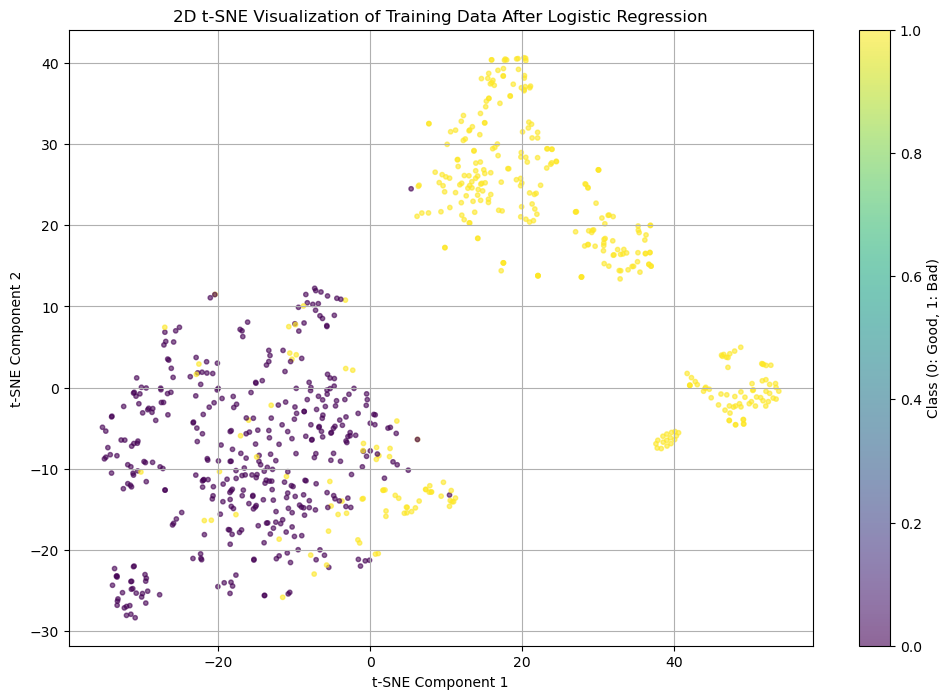

In [10]:
# After training the logistic regression model
model = LogisticRegressionCustom(learning_rate=0.01, max_iter=1000)
model.fit(X_train, y_train)
# Step 1: Extract weights and evaluate feature importance
weights = model.weights
feature_importance = pd.Series(weights, index=data.columns[:-1]).sort_values(ascending=False)
print("Feature Importance (Weights):")
print(feature_importance)
# Step 2: Perform t-SNE on the training data after logistic regression
print("Starting t-SNE computation on training data after logistic regression...")
# Create t-SNE instance with fixed random seed for reproducibility
tsne_after_lr = TSNE(n_components=2, random_state=42, verbose=1, init='random', learning_rate='auto')
# Fit and transform the standardized training data to 2D
X_train_tsne = tsne_after_lr.fit_transform(X_train)
print("t-SNE computation finished.")
# Step 3: Plot t-SNE results colored by class
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.6, s=10)
plt.colorbar(scatter, label='Class (0: Good, 1: Bad)')
plt.title('2D t-SNE Visualization of Training Data After Logistic Regression')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


In [11]:
# Evaluation metrics
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    accuracy = (tp + tn) / len(y_true)

    precision_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
    recall_0 = tn / (tn + fn) if (tn + fn) > 0 else 0
    f1_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0

    precision_1 = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_1 = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0

    report = f"""
    Overall Accuracy: {accuracy:.4f}
    
    Class 0 (Good Accounts):
    Precision: {precision_0:.4f}
    Recall: {recall_0:.4f}
    F1 Score: {f1_score_0:.4f}

    Class 1 (Bad Accounts):
    Precision: {precision_1:.4f}
    Recall: {recall_1:.4f}
    F1 Score: {f1_score_1:.4f}
    """
    return report

# Print evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[55327  1536]
 [   10    88]]

Classification Report:

    Overall Accuracy: 0.9729
    
    Class 0 (Good Accounts):
    Precision: 0.9730
    Recall: 0.9998
    F1 Score: 0.9862

    Class 1 (Bad Accounts):
    Precision: 0.0542
    Recall: 0.8980
    F1 Score: 0.1022
    
